In [1]:
import pandas as pd      
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [4]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)


In [5]:
#Load Dataset

In [6]:
df = pd.read_csv("medicines_data.csv")

In [7]:
#data inspection

In [8]:
print("Shape of data:", df.shape)

Shape of data: (248218, 19)


In [9]:
print("Columns:", df.columns.tolist())

Columns: ['medicine_id', 'medicine_name', 'substitutes', 'uses', 'side_effects', 'chemical_class', 'therapeutic_class', 'habit_forming', 'action_class', 'city', 'area', 'pharmacy_name', 'store_stock', 'warehouse_stock', 'price', 'expiry_date', 'days_to_expiry', 'stock_status', 'needs_reorder']


In [10]:
df.describe()

,medicine_id,store_stock,warehouse_stock,price,days_to_expiry,needs_reorder
count,248218.000000,248218.000000,248218.000000,248218.000000,248218.000000,248218.000000
mean,124109.500000,149.335713,403.094614,1290.090088,123.905889,0.100609
std,71654.508896,86.583413,165.911357,699.106881,376.956491,0.300811
min,1.000000,0.000000,10.000000,80.020000,-530.000000,0.000000
25%,62055.250000,74.000000,279.000000,684.650000,-201.000000,0.000000
50%,124109.500000,149.000000,403.000000,1288.505000,123.000000,0.000000
75%,186163.750000,224.000000,527.000000,1897.187500,450.000000,0.000000
max,248218.000000,299.000000,797.000000,2500.000000,778.000000,1.000000


In [11]:
df.isnull().sum()

medicine_id               0
medicine_name             0
substitutes               0
uses                      0
side_effects              0
chemical_class       110427
therapeutic_class        69
habit_forming             0
action_class         110182
city                      0
area                      0
pharmacy_name             0
store_stock               0
warehouse_stock           0
price                     0
expiry_date               0
days_to_expiry            0
stock_status              0
needs_reorder             0
dtype: int64

In [12]:
df=df.drop("chemical_class",axis=1)
df

,medicine_id,medicine_name,substitutes,uses,side_effects,therapeutic_class,habit_forming,action_class,city,area,pharmacy_name,store_stock,warehouse_stock,price,expiry_date,days_to_expiry,stock_status,needs_reorder
0,1,augmentin 625 duo tablet,"['Penciclav 500 mg/125 mg Tablet', 'Moxikind-C...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea']",ANTI INFECTIVES,No,NaN,Islamabad,F-10,HealthPlus,65,119,1687.82,03-10-2026,324,in_stock,0
1,2,azithral 500 tablet,"['Zithrocare 500mg Tablet', 'Azax 500 Tablet',...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Abdominal pain', 'Diar...",ANTI INFECTIVES,No,Macrolides,Islamabad,I-8,Dawaai Pharmacy,247,705,2486.81,03-05-2026,171,in_stock,0
2,3,ascoril ls syrup,"['Solvin LS Syrup', 'Ambrodil-LX Syrup', 'Zero...",['Treatment of Cough with mucus'],"['Nausea', 'Vomiting', 'Diarrhea', 'Upset stom...",RESPIRATORY,No,NaN,Islamabad,I-8,Dawaai Pharmacy,51,190,1478.35,17-09-2027,673,in_stock,0
3,4,allegra 120mg tablet,"['Lcfex Tablet', 'Etofex 120mg Tablet', 'Nexof...",['Treatment of Sneezing and runny nose due to ...,"['Headache', 'Drowsiness', 'Dizziness', 'Nausea']",RESPIRATORY,No,H1 Antihistaminics (second Generation),Islamabad,I-8,Dawaai Pharmacy,65,118,1709.60,24-12-2024,-324,in_stock,0
4,5,avil 25 tablet,['Eralet 25mg Tablet'],['Treatment of Allergic conditions'],"['Sleepiness', 'Dryness in mouth']",RESPIRATORY,No,H1 Antihistaminics (First Generation),Lahore,Gulberg,Servaid Pharmacy,37,343,1792.57,14-12-2024,-334,in_stock,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248213,248214,zestrain 100mg/325mg/250mg tablet mr,"['Aclotec MR 100mg/325mg/250mg Tablet', 'SAMON...",['Treatment of Muscular pain'],"['Nausea', 'Vomiting', 'Heartburn', 'Stomach p...",PAIN ANALGESICS,No,NaN,Islamabad,F-7,MediZone,26,467,1854.40,18-07-2026,247,low_stock,1
248214,248215,zoxinace 200mg tablet sr,"['Algic 200mg Tablet SR', 'Topnac 200mg Tablet...",[' Pain relief'],"['Dizziness', 'Indigestion', 'Nausea', 'Abdomi...",PAIN ANALGESICS,No,NSAID's- Non-Selective COX 1&2 Inhibitors (ace...,Karachi,Nazimabad,HealthPlus,110,123,1416.02,23-08-2026,283,in_stock,0
248215,248216,zivex 25mg tablet,"['HD Zine 25mg Tablet', 'Hydrocas 25mg Tablet'...","['Treatment of Anxiety', 'Treatment of Skin co...","['Sedation', 'Nausea', 'Vomiting', 'Upset stom...",RESPIRATORY,No,H1 Antihistaminics (First Generation),Islamabad,F-7,Servaid Pharmacy,297,640,985.49,21-04-2027,524,in_stock,0
248216,248217,zi fast 500mg injection,"['Zycin 500mg Injection', 'Aziwok 500mg Inject...",['Treatment of Bacterial infections'],"['Injection site reactions (pain, swelling, re...",ANTI INFECTIVES,No,Macrolides,Lahore,Model Town,Servaid Pharmacy,21,138,1227.64,21-08-2024,-449,low_stock,1


In [13]:
df.isnull().sum()

medicine_id               0
medicine_name             0
substitutes               0
uses                      0
side_effects              0
therapeutic_class        69
habit_forming             0
action_class         110182
city                      0
area                      0
pharmacy_name             0
store_stock               0
warehouse_stock           0
price                     0
expiry_date               0
days_to_expiry            0
stock_status              0
needs_reorder             0
dtype: int64

In [14]:
#target variable

In [15]:
df['is_available'] = (df['stock_status'] != 'out_of_stock').astype(int)
# If the value is NOT equal to out_of_stock returns True
# If the value iS equal to out_of_stock returns False

In [16]:
df['is_available']

0         1
1         1
2         1
3         1
4         1
         ..
248213    1
248214    1
248215    1
248216    1
248217    1
Name: is_available, Length: 248218, dtype: int64

In [17]:
df = df.drop("action_class",axis=1)
df

,medicine_id,medicine_name,substitutes,uses,side_effects,therapeutic_class,habit_forming,city,area,pharmacy_name,store_stock,warehouse_stock,price,expiry_date,days_to_expiry,stock_status,needs_reorder,is_available
0,1,augmentin 625 duo tablet,"['Penciclav 500 mg/125 mg Tablet', 'Moxikind-C...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea']",ANTI INFECTIVES,No,Islamabad,F-10,HealthPlus,65,119,1687.82,03-10-2026,324,in_stock,0,1
1,2,azithral 500 tablet,"['Zithrocare 500mg Tablet', 'Azax 500 Tablet',...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Abdominal pain', 'Diar...",ANTI INFECTIVES,No,Islamabad,I-8,Dawaai Pharmacy,247,705,2486.81,03-05-2026,171,in_stock,0,1
2,3,ascoril ls syrup,"['Solvin LS Syrup', 'Ambrodil-LX Syrup', 'Zero...",['Treatment of Cough with mucus'],"['Nausea', 'Vomiting', 'Diarrhea', 'Upset stom...",RESPIRATORY,No,Islamabad,I-8,Dawaai Pharmacy,51,190,1478.35,17-09-2027,673,in_stock,0,1
3,4,allegra 120mg tablet,"['Lcfex Tablet', 'Etofex 120mg Tablet', 'Nexof...",['Treatment of Sneezing and runny nose due to ...,"['Headache', 'Drowsiness', 'Dizziness', 'Nausea']",RESPIRATORY,No,Islamabad,I-8,Dawaai Pharmacy,65,118,1709.60,24-12-2024,-324,in_stock,0,1
4,5,avil 25 tablet,['Eralet 25mg Tablet'],['Treatment of Allergic conditions'],"['Sleepiness', 'Dryness in mouth']",RESPIRATORY,No,Lahore,Gulberg,Servaid Pharmacy,37,343,1792.57,14-12-2024,-334,in_stock,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248213,248214,zestrain 100mg/325mg/250mg tablet mr,"['Aclotec MR 100mg/325mg/250mg Tablet', 'SAMON...",['Treatment of Muscular pain'],"['Nausea', 'Vomiting', 'Heartburn', 'Stomach p...",PAIN ANALGESICS,No,Islamabad,F-7,MediZone,26,467,1854.40,18-07-2026,247,low_stock,1,1
248214,248215,zoxinace 200mg tablet sr,"['Algic 200mg Tablet SR', 'Topnac 200mg Tablet...",[' Pain relief'],"['Dizziness', 'Indigestion', 'Nausea', 'Abdomi...",PAIN ANALGESICS,No,Karachi,Nazimabad,HealthPlus,110,123,1416.02,23-08-2026,283,in_stock,0,1
248215,248216,zivex 25mg tablet,"['HD Zine 25mg Tablet', 'Hydrocas 25mg Tablet'...","['Treatment of Anxiety', 'Treatment of Skin co...","['Sedation', 'Nausea', 'Vomiting', 'Upset stom...",RESPIRATORY,No,Islamabad,F-7,Servaid Pharmacy,297,640,985.49,21-04-2027,524,in_stock,0,1
248216,248217,zi fast 500mg injection,"['Zycin 500mg Injection', 'Aziwok 500mg Inject...",['Treatment of Bacterial infections'],"['Injection site reactions (pain, swelling, re...",ANTI INFECTIVES,No,Lahore,Model Town,Servaid Pharmacy,21,138,1227.64,21-08-2024,-449,low_stock,1,1


In [18]:
#fill with na

In [19]:
df['therapeutic_class'] = df['therapeutic_class'].fillna("Therapist")

In [20]:
df.to_csv("Medicine.csv", index=False)


In [21]:
cat_cols = [
    'therapeutic_class',
    'habit_forming',
    'city',
    'area',
    'pharmacy_name'
]

In [22]:
for c in cat_cols:
    df[c] = df[c].fillna("Unknown")


In [23]:
#numeric columns

In [24]:
num_cols = ['store_stock', 'warehouse_stock', 'price', 'days_to_expiry']
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())


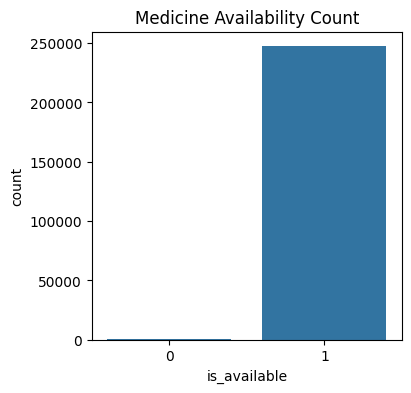

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x=df["is_available"])
plt.title("Medicine Availability Count")
plt.show()


In [26]:
for c in num_cols:
    low, high = df[c].quantile([0.01, 0.99])
    df[c] = df[c].clip(low, high)

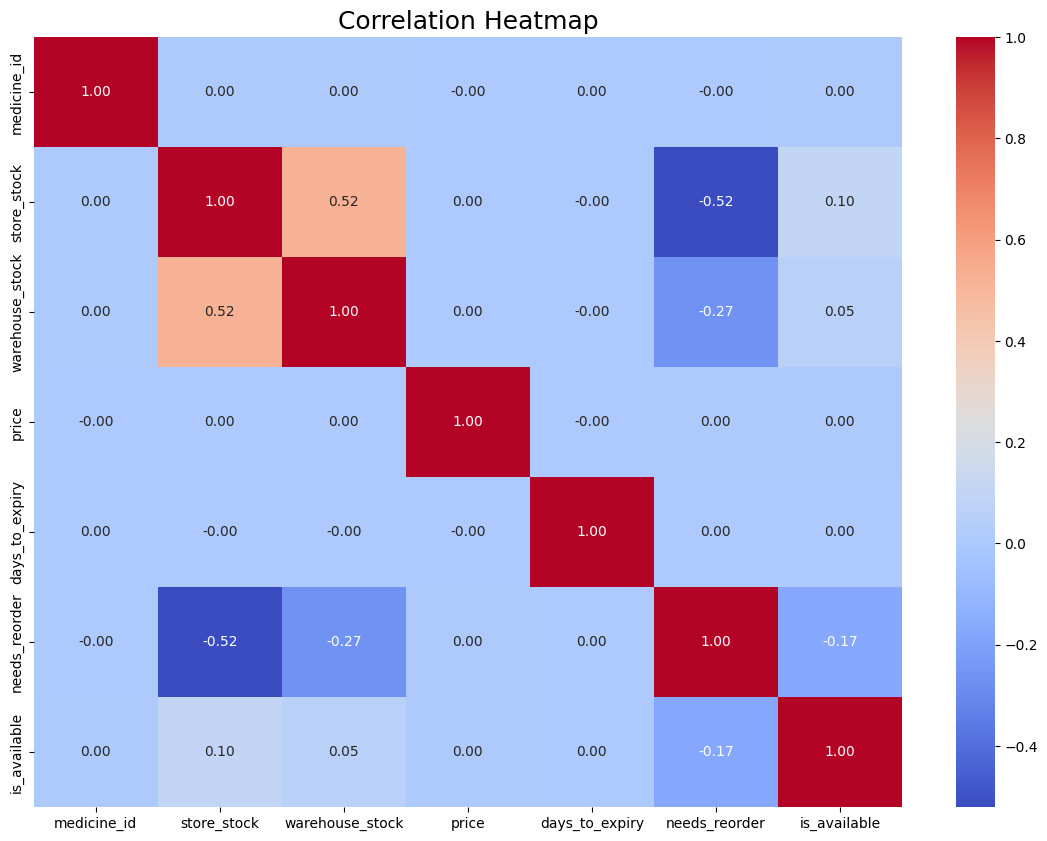

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [28]:
target_corr = corr_matrix["is_available"].sort_values(ascending=False)
print("Correlation With Target:\n")
print(target_corr)
before=df.copy()

Correlation With Target:

is_available       1.000000
store_stock        0.097766
warehouse_stock    0.050098
price              0.002649
medicine_id        0.002478
days_to_expiry     0.001353
needs_reorder     -0.171711
Name: is_available, dtype: float64


In [29]:
feature_cols = num_cols + cat_cols

X = df[feature_cols]
y = df['is_available']


In [30]:
feature_cols

['store_stock',
 'warehouse_stock',
 'price',
 'days_to_expiry',
 'therapeutic_class',
 'habit_forming',
 'city',
 'area',
 'pharmacy_name']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [33]:
#Over-sampling

In [34]:
train_df = X_train.copy()
train_df['is_available'] = y_train.values

In [35]:
# minority = train_df[train_df['is_available'] == 0]
# majority = train_df[train_df['is_available'] == 1]#filters the DataFrame to get only rows where is_available = 0


In [36]:
# ratio = 20  # keep majority efines a ratio of 2:1 (majority:minority)
# majority_sampled = majority.sample(n=len(minority) * ratio, random_state=42)#frac=1.0 means "return 100% of the rows" (i.e., all rows)
# #sample frac=1.0 randomly shuffles all rows

In [37]:
# balanced_df = pd.concat([minority, majority_sampled], axis=0)
# balanced_df = balanced_df.sample(frac=1.0, random_state=42)#suflling the rows 


In [38]:
# X_train_bal = balanced_df[feature_cols]
# y_train_bal = balanced_df['is_available']
from imblearn.over_sampling import SMOTENC
cat_cols = ['therapeutic_class', 'habit_forming', 'city', 'area', 'pharmacy_name']
categorical_indices = [X.columns.get_loc(col) for col in cat_cols]

sm = SMOTENC(categorical_features=categorical_indices, random_state=42)

X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict())
print("After SMOTE:", X_train_bal.shape, y_train_bal.value_counts().to_dict())


Before SMOTE: (198574, 9) {1: 197921, 0: 653}
After SMOTE: (395842, 9) {1: 197921, 0: 197921}


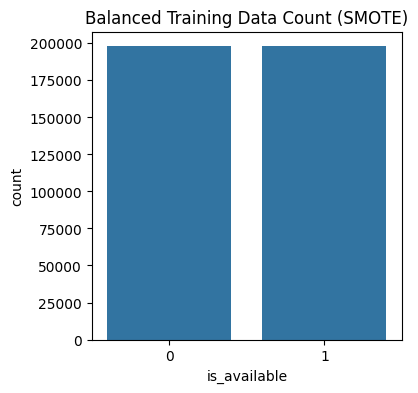

In [39]:
plt.figure(figsize=(4,4))
sns.countplot(x=y_train_bal)
plt.title("Balanced Training Data Count (SMOTE)")
plt.show()

In [50]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
#making pipeline for using the scaler in future 

In [51]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [52]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

log_reg = LogisticRegression(
    max_iter=500,
    class_weight="balanced",
    n_jobs=-1
)

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

gb = GradientBoostingClassifier(random_state=42)


In [54]:
pipelines = {
    "LogisticRegression": Pipeline([
        ('preprocess', preprocess),
        ('model', log_reg)
    ]),
    
    "RandomForest": Pipeline([
        ('preprocess', preprocess),
        ('model', rf)
    ]),
    
    "GradientBoosting": Pipeline([
        ('preprocess', preprocess),
        ('model', gb)
    ])
}


In [55]:
from sklearn.metrics import accuracy_score, classification_report

for name, clf in pipelines.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train_bal, y_train_bal)
    preds = clf.predict(X_test)
    
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))



Training LogisticRegression...
LogisticRegression Accuracy: 0.9786
              precision    recall  f1-score   support

           0       0.13      0.99      0.23       163
           1       1.00      0.98      0.99     49481

    accuracy                           0.98     49644
   macro avg       0.57      0.99      0.61     49644
weighted avg       1.00      0.98      0.99     49644


Training RandomForest...
RandomForest Accuracy: 0.9935
              precision    recall  f1-score   support

           0       0.31      0.83      0.46       163
           1       1.00      0.99      1.00     49481

    accuracy                           0.99     49644
   macro avg       0.66      0.91      0.73     49644
weighted avg       1.00      0.99      0.99     49644


Training GradientBoosting...
GradientBoosting Accuracy: 0.9931
              precision    recall  f1-score   support

           0       0.32      0.98      0.48       163
           1       1.00      0.99      1.00     4

In [56]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('log_reg', pipelines["LogisticRegression"].steps[-1][1]),
        ('rf', pipelines["RandomForest"].steps[-1][1]),
        ('gb', pipelines["GradientBoosting"].steps[-1][1])
    ],
    voting='soft'
)

# Wrap VotingClassifier in the global preprocessing pipeline
ensemble_clf = Pipeline([
    ('preprocess', preprocess),
    ('model', ensemble)
])


In [57]:
print("\nTraining Ensemble Model...")
ensemble_clf.fit(X_train_bal, y_train_bal)
ensemble_preds = ensemble_clf.predict(X_test)

print("\nEnsemble Model Accuracy:", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test, ensemble_preds))



Training Ensemble Model...

Ensemble Model Accuracy: 0.9930706631214246
              precision    recall  f1-score   support

           0       0.32      0.99      0.49       163
           1       1.00      0.99      1.00     49481

    accuracy                           0.99     49644
   macro avg       0.66      0.99      0.74     49644
weighted avg       1.00      0.99      0.99     49644



In [59]:
from sklearn.preprocessing import label_binarize
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]


In [60]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]


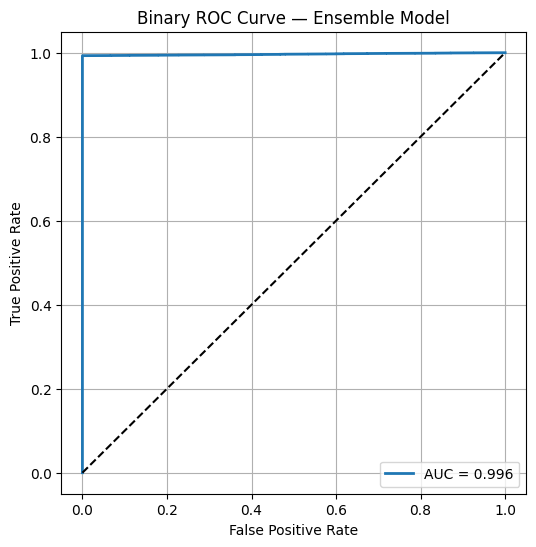

In [81]:
from sklearn.metrics import roc_curve, auc

y_score = ensemble_clf.predict_proba(X_test)[:, 1]  # probability of class 1

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Binary ROC Curve — Ensemble Model")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Use the preprocess stored inside the RandomForest pipeline
rf_clf = pipelines["RandomForest"]
rf_clf.fit(X_train_bal, y_train_bal)



In [100]:
import numpy as np
import shap

# 1. Get fitted RF pipeline
rf_clf = pipelines["RandomForest"]     # already fitted

# 2. Extract preprocess & model
pre = rf_clf.named_steps["preprocess"]
rf_model = rf_clf.named_steps["model"]

# 3. Transform X_train_bal and X_test using SAME preprocesser
X_train_enc = pre.transform(X_train_bal)
X_test_enc = pre.transform(X_test)

# 4. Convert sparse → dense
X_train_enc = X_train_enc.toarray()
X_test_enc = X_test_enc.toarray()

print("Train encoded shape:", X_train_enc.shape)
print("Test encoded shape:", X_test_enc.shape)


Train encoded shape: (395842, 52)
Test encoded shape: (49644, 52)


In [101]:
feature_names = pre.get_feature_names_out()
print("Feature name count:", len(feature_names))


Feature name count: 52


In [102]:
# Pick 100 random background rows for SHAP
bg_idx = np.random.choice(X_train_enc.shape[0], size=min(100, X_train_enc.shape[0]), replace=False)
background = X_train_enc[bg_idx]


In [103]:
explainer = shap.TreeExplainer(
    rf_model,
    data=background,
    model_output="probability"
)


In [104]:
sample_idx = np.random.choice(
    X_test_enc.shape[0],
    size=min(300, X_test_enc.shape[0]),
    replace=False
)
X_explain = X_test_enc[sample_idx]

print("X_explain shape:", X_explain.shape)


X_explain shape: (300, 52)


In [105]:
shap_vals = explainer.shap_values(X_explain)
print("Raw SHAP output shape:", np.array(shap_vals).shape)


 99%|===================| 596/600 [01:24<00:00]        

Raw SHAP output shape: (300, 52, 2)


In [106]:
shap_vals_pos = shap_vals[:, :, 1]   # shape → (300, 52)

print("Corrected shap_vals_pos shape:", shap_vals_pos.shape)


Corrected shap_vals_pos shape: (300, 52)


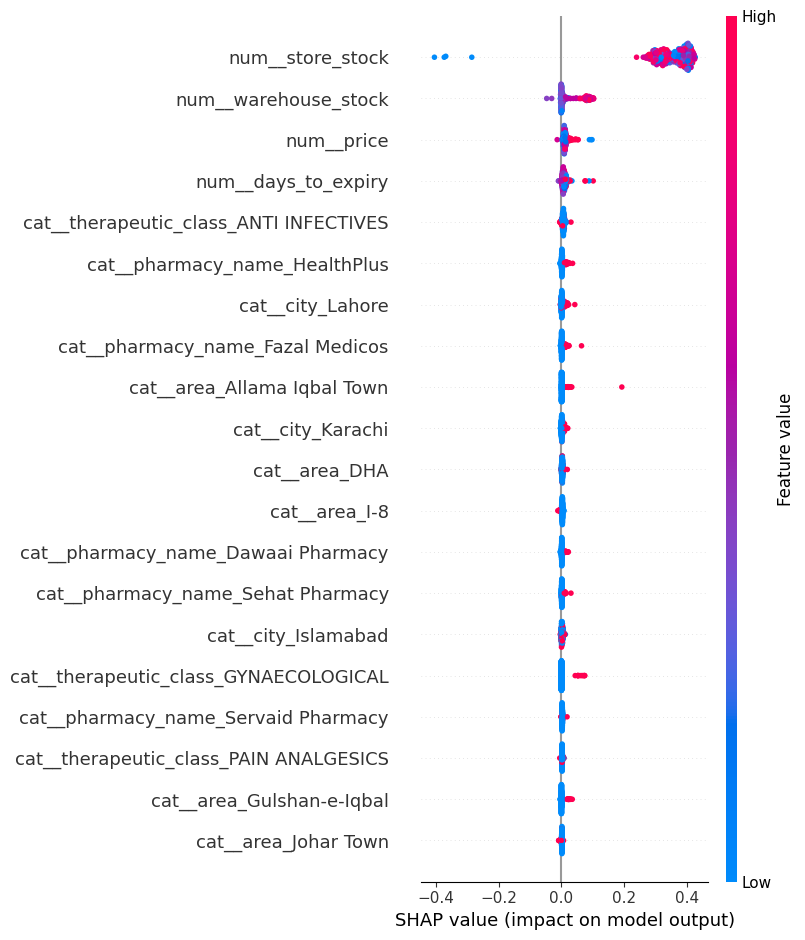

In [107]:
shap.summary_plot(shap_vals_pos, X_explain, feature_names=feature_names)


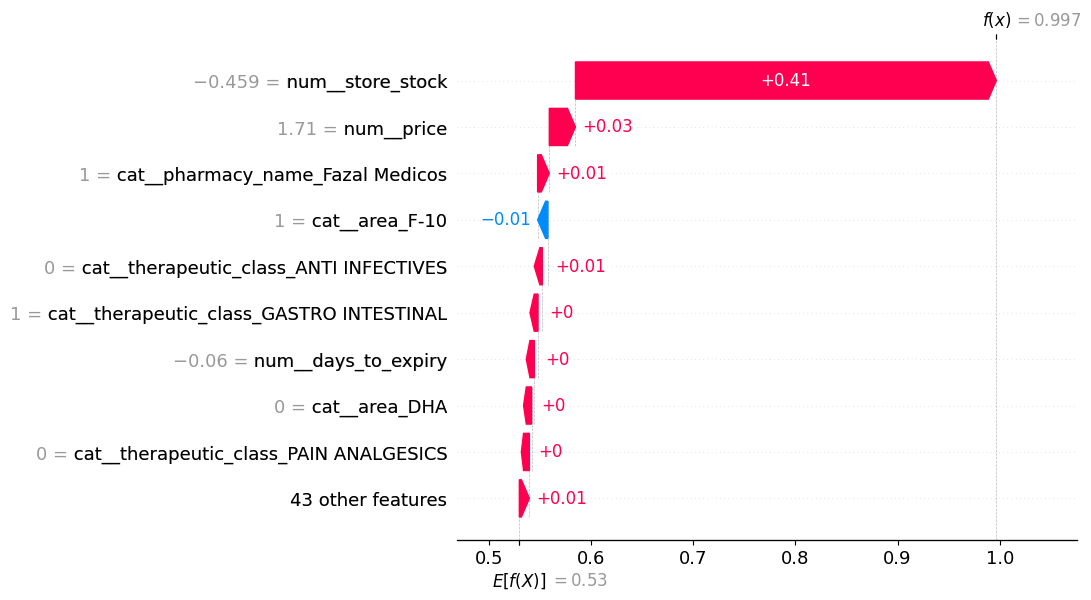

In [108]:
i = 0  # choose first sample

shap.plots.waterfall(
    shap.Explanation(
        values=shap_vals_pos[i],
        base_values=explainer.expected_value[1],
        data=X_explain[i],
        feature_names=feature_names
    )
)


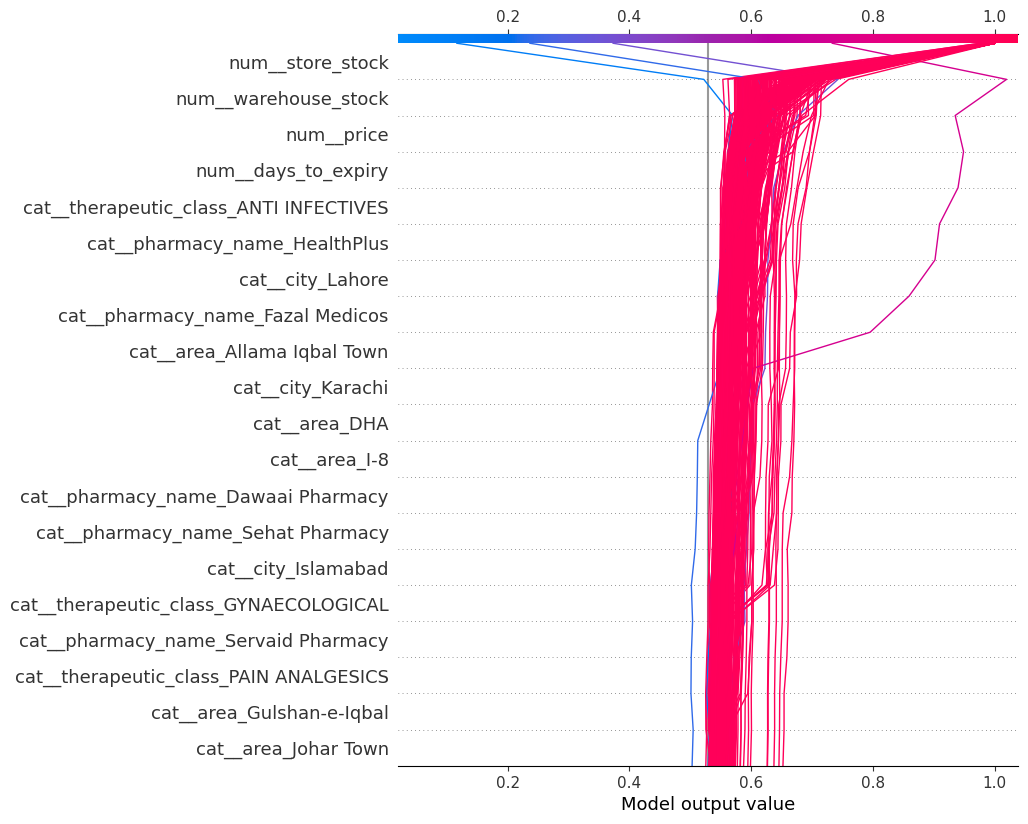

In [109]:
shap.decision_plot(
    explainer.expected_value[1],
    shap_vals_pos,
    feature_names=feature_names
)
